# Processing of DOU masks

In [1]:
import nibabel as nib
import nilearn as nil
import numpy as np 
import sys
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import pdist

import cmbnet.preprocessing.loading as loading

import cmbnet.preprocessing.process_masks as process_masks
from cmbnet.preprocessing.loading import get_dataset_subjects
from cmbnet.preprocessing.datasets.dou import load_DOU_raw, process_DOU_anno, perform_DOU_QC
import cmbnet.visualization.utils_plotting as utils_plt
import os
from typing import Tuple, List, Dict
import matplotlib.pyplot as plt

import importlib
import cmbnet
importlib.reload(cmbnet)


<module 'cmbnet' from '/home/cerebriu/data/RESEARCH/MicrobleedNet/cmbnet/__init__.py'>

In [2]:
input_dir = "/home/cerebriu/data/datasets/raw/DOU"
subjects = loading.get_dataset_subjects("dou", input_dir)

In [3]:
class Args:
    def __init__(self, input_dir = "/home/cerebriu/data/datasets/raw/DOU", dataset_name="momeni"):
        self.input_dir = input_dir
        self.dataset_name = dataset_name

In [4]:
results = {}
subjects_temp = subjects
subjects_temp = ['09']

for subject in subjects_temp:
    print("------------------------------------------------")
    print(subject)
    print("------------------------------------------------")

    # Load data
    args = Args()
    sequences_raw, labels_raw, sequence_type, com_list = load_DOU_raw(args.input_dir, subject)
    print(f"CMBs: {com_list}")
    sequences_qc, labels_qc, labels_metadata, msg = perform_DOU_QC(args, subject, sequences_raw, labels_raw, com_list, "")

    mri_im_raw = sequences_raw[sequence_type]
    rawcmb_im_raw = labels_raw[sequence_type]
    grownmask_raw = labels_qc[sequence_type]

    results[subject] = {
        "raw": (sequences_raw, labels_raw, sequence_type, com_list),
        "qc": (sequences_qc, labels_qc, labels_metadata, msg)
    }
    print(msg)

    print(f"shape: {mri_im_raw.shape}")

    # Plotting processed masks for each center of mass
    for i, CM in enumerate(com_list):
        print(CM)                                  
        metadata_str = f"""\
        sub: {subject}
        {sequence_type}, shape: {mri_im_raw.shape}
        CMBloc: {CM}   CMBsize: {labels_metadata[sequence_type]["CMBs_old"][i]['size']}
        "connectivity": {labels_metadata[sequence_type]["CMBs_old"][i]['region_growing']['connectivity']}, "intensity_mode": {labels_metadata[sequence_type]["CMBs_old"][i]['region_growing']['intensity_mode']}, 
        "diff_mode": {labels_metadata[sequence_type]["CMBs_old"][i]['region_growing']['diff_mode']}, 
        "distance_th": {labels_metadata[sequence_type]["CMBs_old"][i]['region_growing']['distance_th']},"size_th": {labels_metadata[sequence_type]["CMBs_old"][i]['region_growing']['size_th']}"""


        filename_temp = os.path.join("/home/cerebriu/Downloads", f"MOMENI_{subject}.png")
        utils_plt.plot_processed_mask(mri_im_raw, rawcmb_im_raw, grownmask_raw, CM, 100, metadata_str=metadata_str, save_path=None)

------------------------------------------------
09
------------------------------------------------


(212, 331, 110)


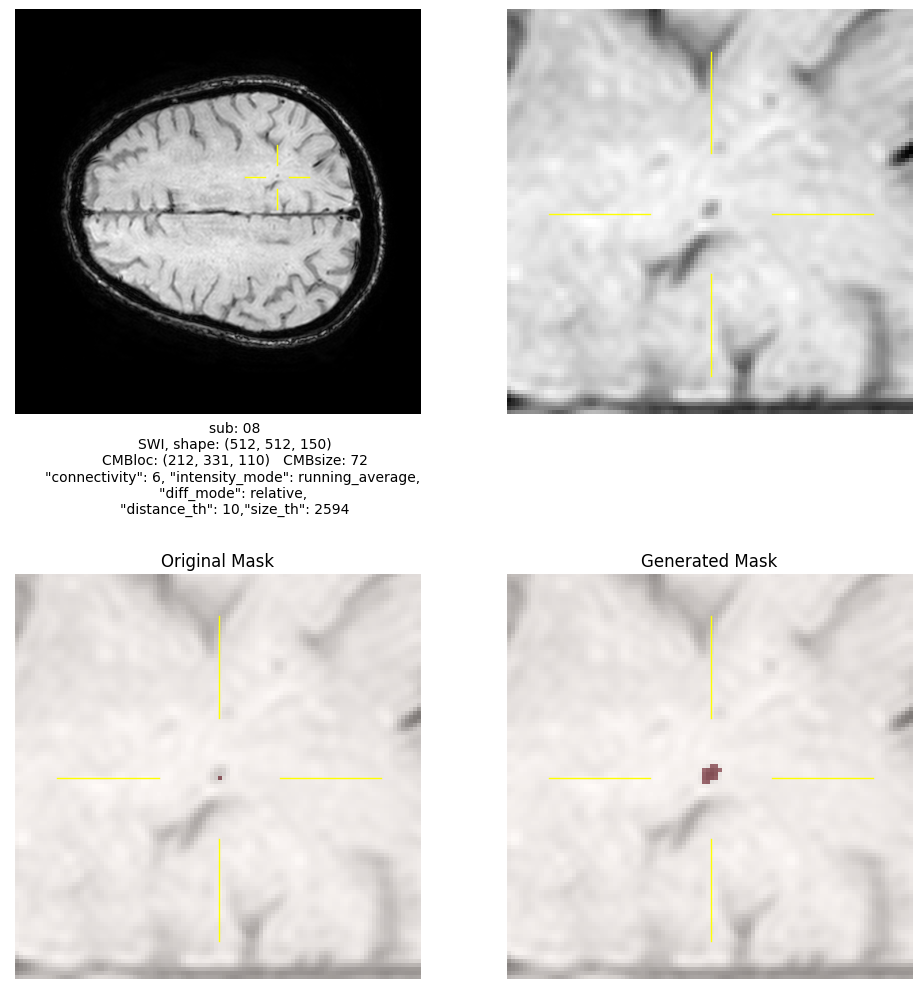

In [ ]:
for i, CM in enumerate(com_list):
        print(CM)                                  
        metadata_str = f"""\
        sub: {subject}
        {sequence_type}, shape: {mri_im_raw.shape}
        CMBloc: {CM}   CMBsize: {labels_metadata[sequence_type]["CMBs_old"][i]['size']}
        "connectivity": {labels_metadata[sequence_type]["CMBs_old"][i]['region_growing']['connectivity']}, "intensity_mode": {labels_metadata[sequence_type]["CMBs_old"][i]['region_growing']['intensity_mode']}, 
        "diff_mode": {labels_metadata[sequence_type]["CMBs_old"][i]['region_growing']['diff_mode']}, 
        "distance_th": {labels_metadata[sequence_type]["CMBs_old"][i]['region_growing']['distance_th']},"size_th": {labels_metadata[sequence_type]["CMBs_old"][i]['region_growing']['size_th']}"""


        filename_temp = os.path.join("/home/cerebriu/Downloads", f"MOMENI_{subject}.png")
        utils_plt.plot_processed_mask(mri_im_raw, rawcmb_im_raw, grownmask_raw, CM, 100, metadata_str=metadata_str, save_path=None)